In [ ]:
from google.colab import files
from io import BytesIO
# Display images.
from IPython.display import display
from PIL import ImageEnhance
from PIL import Image

In [ ]:
!pip install Pillow

In [ ]:
from glob import glob
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,  BatchNormalization, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense

In [ ]:
import os
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns

In [ ]:
source_dir='/content/drive/MyDrive/Datasets'


In [ ]:
!pip install aiofiles

In [ ]:
!pip install numpy-stl matplotlib

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install Required Libraries
!pip install trimesh pillow numpy matplotlib pyrender

# Step 3: Import Required Libraries
import os
import trimesh
import numpy as np
import matplotlib.pyplot as plt
import pyrender
from PIL import Image

# Step 4: Define Paths in Google Drive
base_input_folder = "/content/drive/MyDrive/Datasets/"  # Folder containing STL files
base_output_folder = "/content/drive/MyDrive/Front_View_Screenshots/"  # Output folder for images

# Ensure the output directory exists
os.makedirs(base_output_folder, exist_ok=True)

def capture_solid_front_view(stl_path, save_path, img_size=(224, 224)):
    """
    Captures a **clean front-view** screenshot of an STL file (without mesh).

    Args:
        stl_path (str): Path to the STL file.
        save_path (str): Path to save the 2D image.
        img_size (tuple): Output image size (default: 224x224).
    """
    try:
        # Load the STL file
        mesh = trimesh.load_mesh(stl_path)

        if mesh.is_empty:
            print(f"❌ Error: Could not load STL file - {stl_path}")
            return

        # Convert to pyrender scene
        scene = pyrender.Scene()
        mesh = pyrender.Mesh.from_trimesh(mesh)
        scene.add(mesh)

        # Set up the camera for **front view**
        camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
        scene.add(camera, pose=[[1, 0, 0, 0],  # Look straight at the object
                                [0, 1, 0, 0],
                                [0, 0, 1, 2],  # Move the camera back to capture front
                                [0, 0, 0, 1]])

        # Render the scene
        r = pyrender.OffscreenRenderer(500, 500)  # High-resolution rendering
        color, _ = r.render(scene)

        # Convert to grayscale and save
        image = Image.fromarray(color)
        image = image.convert("L")  # Convert to grayscale
        image = image.resize(img_size)
        image.save(save_path)
        print(f"✅ Successfully saved: {save_path}")

    except Exception as e:
        print(f"❌ Error processing {stl_path}: {str(e)}")

# Step 5: Process STL Files in "Broken" and "Not Broken" Folders
for class_label in ["Broken", "Not Broken"]:
    input_folder = os.path.join(base_input_folder, class_label)
    output_folder = os.path.join(base_output_folder, class_label)

    # Ensure output directory exists
    os.makedirs(output_folder, exist_ok=True)

    # Process each STL file in the folder
    for file in os.listdir(input_folder):
        if file.endswith(".stl"):
            stl_path = os.path.join(input_folder, file)
            img_path = os.path.join(output_folder, file.replace(".stl", "_front.png"))

            # Capture front-view screenshot
            capture_solid_front_view(stl_path, img_path)

print(" All front view screenshots saved in:", base_output_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.6 MB/s eta 0:00:00
  Created wheel for PyOpenGL: filename=PyOpenGL-3.1.0-py3-none-any.whl size=1745193 sha256=9e6ee88f8179d0f3ff7e245342d9092c77128c630ea18b98fadc5648161794ce
  Stored in directory: /root/.cache/pip/wheels/2f/37/f5/f88cd3dddf75bc3ce608e44bf8a79078c408bf1f351a50818e
Successfully built PyOpenGL
  Attempting uninstall: PyOpenGL
    Found existing installation: PyOpenGL 3.1.9
    Uninstalling PyOpenGL-3.1.9:
      Successfully uninstalled PyOpenGL-3.1.9
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (10).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Data

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/trimesh/geometry.py", line 388, in weighted_vertex_normals
    return util.unitize(summed_sparse())
                        ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/trimesh/geometry.py", line 362, in summed_sparse
    return matrix.dot(face_normals)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_base.py", line 474, in dot
    return self @ other
           ~~~~~^~~~~~~
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_base.py", line 695, in __matmul__
    return self._matmul_dispatch(other)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_base.py", line 595, in _matmul_dispatch
    return self._matmul_multivector(other)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_coo.py", line 577, in _matmul_multivector
   

❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (14).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (13).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (12).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (11).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (20).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (2).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (19).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (18).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (17).stl: Cannot connect to "None"
❌ Error processing /content/drive/MyDrive/Datasets/Broken/BROKEN (27).stl: Cannot connect to "None"
❌

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/trimesh/geometry.py", line 388, in weighted_vertex_normals
    return util.unitize(summed_sparse())
                        ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/trimesh/geometry.py", line 362, in summed_sparse
    return matrix.dot(face_normals)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_base.py", line 474, in dot
    return self @ other
           ~~~~~^~~~~~~
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_base.py", line 695, in __matmul__
    return self._matmul_dispatch(other)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_base.py", line 595, in _matmul_dispatch
    return self._matmul_multivector(other)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/sparse/_coo.py", line 577, in _matmul_multivector
   

KeyboardInterrupt: 

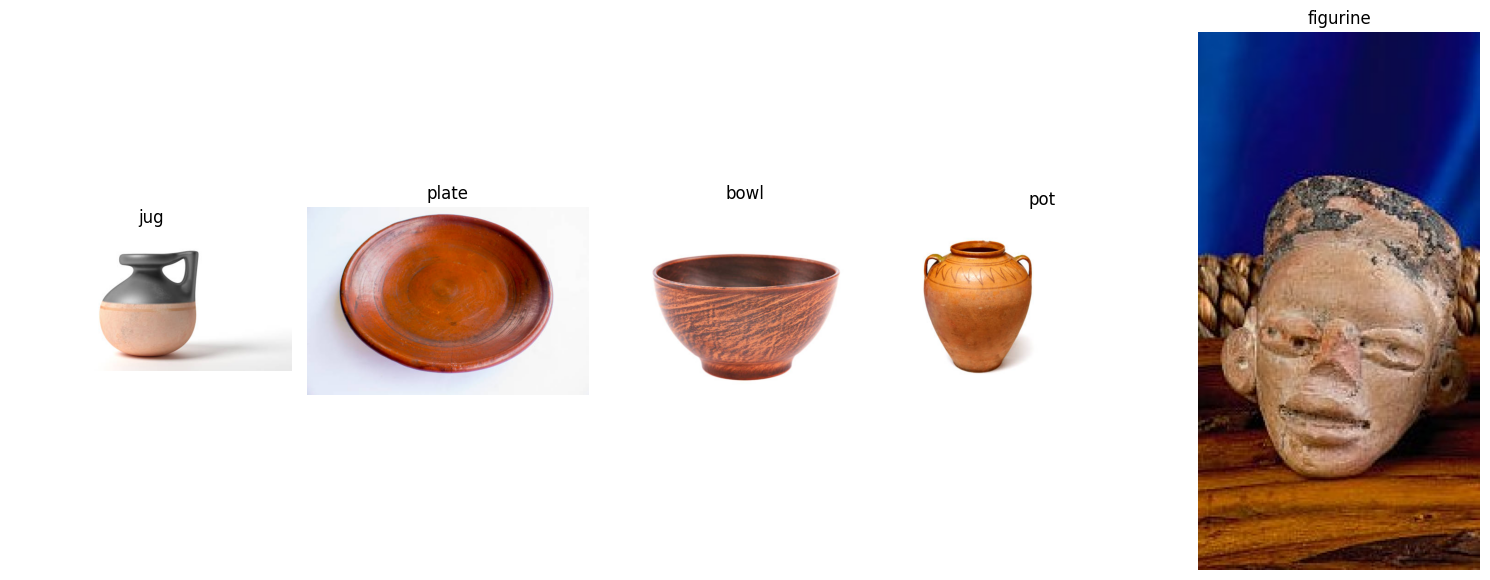

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import random

# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/Datasets'  # Replace with your actual dataset path

# Get a list of labeled folders
labeled_folders = os.listdir(dataset_path)

# Number of labels (assuming 10)
num_labels = len(labeled_folders)

# Create a figure and axes
fig, axes = plt.subplots(1, 5, figsize=(15, 6))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Iterate through all labeled folders
for i, folder_name in enumerate(labeled_folders):
    folder_path = os.path.join(dataset_path, folder_name)
    image_files = os.listdir(folder_path)

    # Select a random image from the folder
    if image_files:  # Check if the folder is not empty
        selected_image = random.choice(image_files)
        image_path = os.path.join(folder_path, selected_image)

        # Read and display the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        axes[i].imshow(image)
        axes[i].set_title(folder_name)  # Set title as folder name (label)
        axes[i].axis('off')
    else:
        print(f"Folder '{folder_name}' is empty. Skipping.")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('labeled_images.pdf')
plt.show()

In [ ]:
import os
import cv2
import imutils # Only if installed in the previous step
import shutil
from tqdm import tqdm # If not already installed, use !pip install tqdm

In [ ]:
def augment_and_save(source_dir, dest_dir):
  """Augments images from source_dir and saves them to dest_dir.

  Args:
    source_dir: The directory containing the original images.
    dest_dir: The directory to save the augmented images.
  """
  os.makedirs(dest_dir, exist_ok=True)
  classes = os.listdir(source_dir)
  for class_name in classes:
      class_path = os.path.join(source_dir, class_name)
      output_class_path = os.path.join(dest_dir, class_name)
      os.makedirs(output_class_path, exist_ok=True)
      for image_name in tqdm(os.listdir(class_path)):
          image_path = os.path.join(class_path, image_name)
          img = cv2.imread(image_path)

          # Rotate by 30 degrees
          rotated_img = imutils.rotate(img, 30)
          cv2.imwrite(os.path.join(output_class_path, f"rotated_{image_name}"), rotated_img)

          # Mirror (flip horizontally)
          mirrored_img = cv2.flip(img, 1)
          cv2.imwrite(os.path.join(output_class_path, f"mirrored_{image_name}"), mirrored_img)

In [ ]:
source_dir = '/content/drive/MyDrive/Datasets' # Your original data directory augmented_dir = '/content/augmented_data' # Where the new data will be saved
augmented_dir='/content/augmented_data'
augment_and_save(source_dir, augmented_dir)

100%|██████████| 54/54 [00:01<00:00, 48.00it/s]


In [ ]:
import os
import shutil
from tqdm import tqdm

def merge_datasets(original_dir, augmented_dir, merged_dir):
  """Merges original and augmented datasets into a new directory.

  Args:
    original_dir: Path to the original dataset directory.
    augmented_dir: Path to the augmented dataset directory.
    merged_dir: Path to the directory where the merged dataset will be saved.
  """
  os.makedirs(merged_dir, exist_ok=True)  # Create merged directory if it doesn't exist

  # Copy original dataset to merged directory
  for class_name in tqdm(os.listdir(original_dir)):
    class_path = os.path.join(original_dir, class_name)
    merged_class_path = os.path.join(merged_dir, class_name)
    os.makedirs(merged_class_path, exist_ok=True)  # Create class subdirectory
    for filename in os.listdir(class_path):
      shutil.copy(os.path.join(class_path, filename), merged_class_path)

  # Copy augmented dataset to merged directory
  for class_name in tqdm(os.listdir(augmented_dir)):
    class_path = os.path.join(augmented_dir, class_name)
    merged_class_path = os.path.join(merged_dir, class_name)
    os.makedirs(merged_class_path, exist_ok=True)  # Class subdirectory already exists
    for filename in os.listdir(class_path):
      shutil.copy(os.path.join(class_path, filename), merged_class_path)

# Example usage
original_dir = '/content/drive/MyDrive/Datasets'  # Replace with your original dataset path
augmented_dir = '/content/augmented_data'  # Replace with your augmented dataset path
merged_dir = '/content/merged_dataset'  # Replace with your desired merged dataset path

merge_datasets(original_dir, augmented_dir, merged_dir)

100%|██████████| 5/5 [00:00<00:00, 12.85it/s]


In [ ]:
from sklearn.model_selection import train_test_split
import os
import shutil
from concurrent.futures import ThreadPoolExecutor

def copy_file(source, destination):

    shutil.copy(source, destination)

def split_data(source_dir, train_dir, val_dir, test_dir, val_size=0.1, test_size=0.1):
    classes = ['bowl', 'figurine','jug', 'plate','pot']

    for label in classes:
        # Create directories if not exist
        os.makedirs(os.path.join(train_dir, label), exist_ok=True)
        os.makedirs(os.path.join(val_dir, label), exist_ok=True)
        os.makedirs(os.path.join(test_dir, label), exist_ok=True)

        # Get list of files in each class
        files = os.listdir(os.path.join(source_dir, label))
        train_files, val_test_files = train_test_split(files, test_size=val_size + test_size)
        val_files, test_files = train_test_split(val_test_files, test_size=test_size / (val_size + test_size))

        # Create paths for each split
        file_mappings = [
            (os.path.join(source_dir, label, file), os.path.join(train_dir, label, file)) for file in train_files
        ] + [
            (os.path.join(source_dir, label, file), os.path.join(val_dir, label, file)) for file in val_files
        ] + [
            (os.path.join(source_dir, label, file), os.path.join(test_dir, label, file)) for file in test_files
        ]

        # Use multithreading to copy files in parallel
        with ThreadPoolExecutor() as executor:
            executor.map(lambda args: copy_file(*args), file_mappings)

# Call the function with your directories
split_data('/content/merged_dataset',
           '/working/train', '/working/val', '/working/test')

In [ ]:
!pip install tqdm
from tqdm import tqdm
import cv2
import numpy as np

In [ ]:
import os
labels = ['Broken','Not Broken']

x_train = [] # training images.
y_train  = [] # training labels.
x_test = [] # testing images.
y_test = [] # testing labels.

image_size = 224

train_dir = '/working/train'  # Assign the path to train_dir
test_dir = '/working/test'    # Assign the path to test_dir


for label in labels:
    trainPath = os.path.join(train_dir,label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file),0)# load images in gray.
        image = Image.fromarray(image)# Convert the image to a PIL image.
        contrast = ImageEnhance.Contrast(image)  # improving contrast
        image = contrast.enhance(1.2)
        brightness = ImageEnhance.Brightness(image)  # improving brightness
        image = brightness.enhance(1.1)
        sharpness = ImageEnhance.Sharpness(image)  # improving Sharpness
        image = sharpness.enhance(1.2)
        image = np.array(image)
        image = cv2.bilateralFilter(image, 2, 50, 50) # remove images noise.
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE) # produce a pseudocolored image.
        image = cv2.resize(image, (image_size, image_size)) # resize images into 224*224.

        x_train.append(image)
        y_train.append(labels.index(label))

    testPath = os.path.join(test_dir,label)
    for file in tqdm(os.listdir(testPath)):
        image = cv2.imread(os.path.join(testPath, file),0)
        image = Image.fromarray(image)# Convert the image to a PIL image.
        contrast = ImageEnhance.Contrast(image)  # improving contrast
        image = contrast.enhance(1.2)
        brightness = ImageEnhance.Brightness(image)  # improving brightness
        image = brightness.enhance(1.1)
        sharpness = ImageEnhance.Sharpness(image)  # improving Sharpness
        image = sharpness.enhance(1.2)
        image = np.array(image)
        image = cv2.bilateralFilter(image, 2, 50, 50)
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)
        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(labels.index(label))

100%|██████████| 31/31 [00:02<00:00, 11.51it/s]


In [ ]:
!pip install imutils
import imutils

In [ ]:
import os
import cv2
import imutils
import numpy as np

def crop_img(img):
    """
    This function crops an image to remove excess background,
    optimized for basic object images like pot, figurine, jug, plate, bowl.

    Args:
        img: The input image as a NumPy array.

    Returns:
        The cropped image as a NumPy array.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adaptive thresholding for varying lighting conditions
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours in the binary image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # Get the largest contour (assumed to be the object)
    c = max(cnts, key=cv2.contourArea)

    # Get bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(c)

    # Crop the image using the bounding rectangle
    new_img = img[y:y + h, x:x + w]

    return new_img


if __name__ == "__main__":
	training = train_dir
	testing = test_dir
	training_dir = os.listdir(training)
	testing_dir = os.listdir(testing)
	IMG_SIZE = 224

	for dir in training_dir:
		save_path = 'cleaned/Training/'+ dir
		path = os.path.join(training,dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path,img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)

	for dir in testing_dir:
		save_path = 'cleaned/Testing/'+ dir
		path = os.path.join(testing,dir)
		image_dir = os.listdir(path)
		for img in image_dir:
			image = cv2.imread(os.path.join(path,img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
train_set = datagen.flow_from_directory(
    '/content//cleaned/Training',
    target_size=(224, 224),
    batch_size=24,
    class_mode='categorical',
    subset='training'
)

Found 596 images belonging to 5 classes.


In [ ]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content//cleaned/Testing',
    target_size=(224, 224),
    batch_size=24,
    class_mode='categorical',
    shuffle=False
)

Found 149 images belonging to 5 classes.


In [ ]:
# Get the shape of the images in the dataset
image_shape = train_set.image_shape

# Get the total number of samples in the dataset
total_samples = train_set.samples

print(f"Image shape: {image_shape}")
print(f"Total samples: {total_samples}")

# To get the shape of a single batch of data, you can use the following:
for images, labels in train_set:
    print(f"Batch image shape: {images.shape}")
    print(f"Batch label shape: {labels.shape}")
    break

Image shape: (224, 224, 3)
Total samples: 596
Batch image shape: (24, 224, 224, 3)
Batch label shape: (24, 5)


In [ ]:
import tensorflow as tf # Import TensorFlow
from tensorflow import keras
from tensorflow.keras import layers
#!pip install tensorflow==2.10

In [ ]:
Zee = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [ ]:
for layer in Zee.layers:
   layer.trainable=False

In [ ]:
Zee.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
for layer in Zee.layers:
    print(layer.name, layer.trainable)

input_layer_1 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_d

In [ ]:
x= tf.keras.layers.GlobalAveragePooling2D()(Zee.output)
x= Dense(128,activation='relu')(x)
x= Dropout(0.2)(x)

In [ ]:
prediction=Dense(5, activation='softmax')(x)

Zee.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_158>

In [ ]:
model=Model(Zee.input, prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.AUC()])

In [ ]:
checkpoint_dir = '/tmp/ckpt/'  # Extract the directory path
os.makedirs(checkpoint_dir, exist_ok=True)  # Create the directory if it doesn't exist

checkpoint_filepath = os.path.join(checkpoint_dir, 'checkpoint.weights.h5')  # Recombine for full path
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
callback =tf.keras.callbacks.BackupAndRestore(backup_dir="/tmp/backup")

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
r=model.fit(train_set,validation_data=test_set,
                      epochs=25,
                      callbacks=[early_stop,callback,model_checkpoint_callback])

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.4904 - auc_1: 0.7834 - loss: 1.2752 - specificity_at_sensitivity_1: 0.8613 - val_accuracy: 0.8188 - val_auc_1: 0.9720 - val_loss: 0.4889 - val_specificity_at_sensitivity_1: 0.9950
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 333ms/step - accuracy: 0.7950 - auc_1: 0.9636 - loss: 0.5301 - specificity_at_sensitivity_1: 0.9912 - val_accuracy: 0.8725 - val_auc_1: 0.9843 - val_loss: 0.3466 - val_specificity_at_sensitivity_1: 0.9966
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 247ms/step - accuracy: 0.8344 - auc_1: 0.9757 - loss: 0.4229 - specificity_at_sensitivity_1: 0.9939 - val_accuracy: 0.9128 - val_auc_1: 0.9925 - val_loss: 0.2612 - val_specificity_at_sensitivity_1: 0.9983
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9137 - auc_1: 0.9911 - loss: 0.2690 - specificity_at_sensitivity_1: 0.9990 - val_accuracy: 0.9195 - val_auc_1: 0.9945 - val_loss: 0.2189 - val_specificity_at_sensitivity_1: 1.0000
Epoch 5/25
25/25 ━━━━━━━━━

In [ ]:
import pandas as pd

In [ ]:
df_zee = pd.DataFrame(r.history)
df_zee.tail()

,accuracy,auc_1,loss,specificity_at_sensitivity_1,val_accuracy,val_auc_1,val_loss,val_specificity_at_sensitivity_1
20,0.942953,0.997952,0.122858,1.0,0.953020,0.998407,0.105295,1.0
21,0.942953,0.997925,0.125333,1.0,0.946309,0.998778,0.101170,1.0
22,0.947987,0.997694,0.129205,1.0,0.966443,0.999037,0.094531,1.0
23,0.963087,0.998424,0.101794,1.0,0.953020,0.998823,0.106683,1.0
24,0.959732,0.998700,0.099851,1.0,0.953020,0.998677,0.103413,1.0


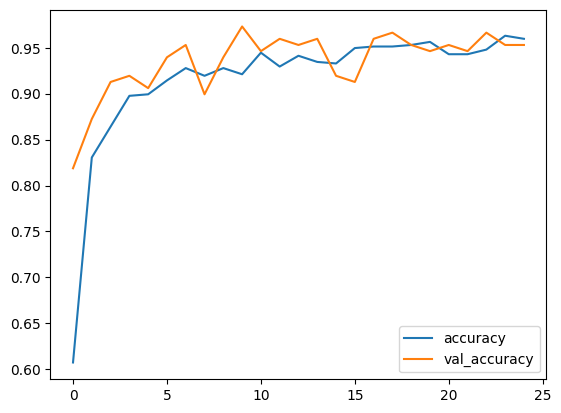

In [ ]:
df_zee[["accuracy","val_accuracy"]].plot();

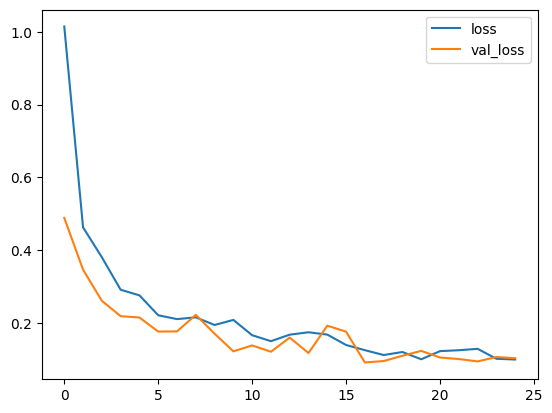

In [ ]:
df_zee[["loss","val_loss"]].plot();

In [ ]:
hist_=pd.DataFrame(r.history)
hist_

,accuracy,auc_1,loss,specificity_at_sensitivity_1,val_accuracy,val_auc_1,val_loss,val_specificity_at_sensitivity_1
0,0.607383,0.869490,1.014782,0.947148,0.818792,0.971972,0.488908,0.994966
1,0.830537,0.972823,0.462864,0.993708,0.872483,0.984325,0.346581,0.996644
2,0.864094,0.979945,0.380907,0.995386,0.912752,0.992472,0.261170,0.998322
3,0.897651,0.988138,0.291537,0.998322,0.919463,0.994538,0.218907,1.000000
4,0.899329,0.989101,0.276131,0.997483,0.906040,0.994251,0.215282,0.998322
5,0.914430,0.993836,0.221441,1.000000,0.939597,0.997162,0.176553,1.000000
6,0.927852,0.993971,0.210839,0.999581,0.953020,0.996611,0.177091,1.000000
7,0.919463,0.993587,0.215679,0.999161,0.899329,0.994004,0.222498,1.000000
8,0.927852,0.994997,0.194635,0.999161,0.939597,0.996875,0.170838,1.000000
9,0.921141,0.993751,0.208630,0.998322,0.973154,0.998711,0.122272,1.000000


In [ ]:
import matplotlib.pyplot as plt

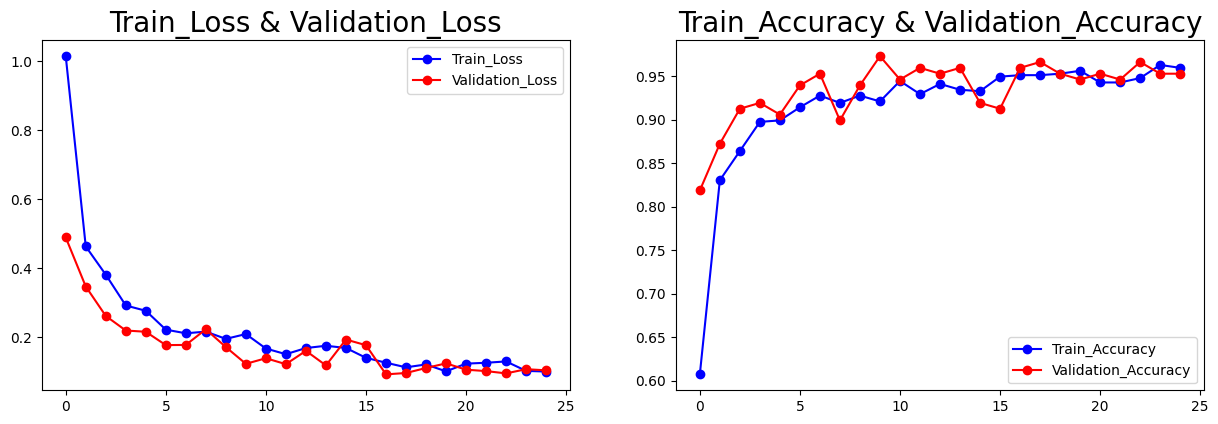

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()


In [ ]:
val_set= ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/working/val',
    target_size=(224, 224),
    batch_size=24,
    class_mode='categorical',
    shuffle=False
)

Found 145 images belonging to 5 classes.


In [ ]:
score,acc,sensitivity,auc= model.evaluate(val_set)
print('Test Loss =', score)
print('Test Accuracy =', acc)
print('Test Sensitivity =', sensitivity)
print('Test AUC =', auc)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9583 - auc_1: 0.9987 - loss: 0.1430 - specificity_at_sensitivity_1: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9739 - auc_1: 0.9989 - loss: 0.1008 - specificity_at_sensitivity_1: 1.0000
Test Loss = 0.09925707429647446
Test Accuracy = 0.9793103337287903
Test Sensitivity = 1.0
Test AUC = 0.9987753033638


In [ ]:
y_test2 =val_set.classes
predictions = model.predict(val_set)

# Find the class with the highest predicted probability for each sample
y_pred2 = np.argmax(predictions, axis=1)

y_test2 = np.ravel(y_test2)
df = pd.DataFrame({'Actual': y_test2, 'Prediction': y_pred2})
print(df)

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
     Actual  Prediction
0         0           0
1         0           0
2         0           0
3         0           0
4         0           0
..      ...         ...
140       4           4
141       4           4
142       4           4
143       4           4
144       4           4

[145 rows x 2 columns]


array([[22,  0,  1,  0,  0],
       [ 0, 29,  0,  0,  0],
       [ 0,  0, 36,  0,  2],
       [ 0,  0,  0, 24,  0],
       [ 0,  0,  0,  0, 31]])

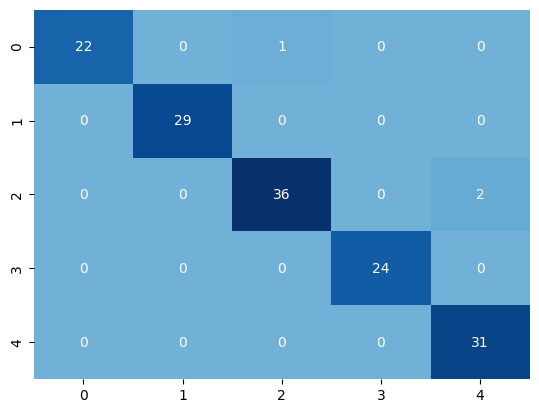

In [ ]:
CM = confusion_matrix(y_test2,y_pred2)
sns.heatmap(CM,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

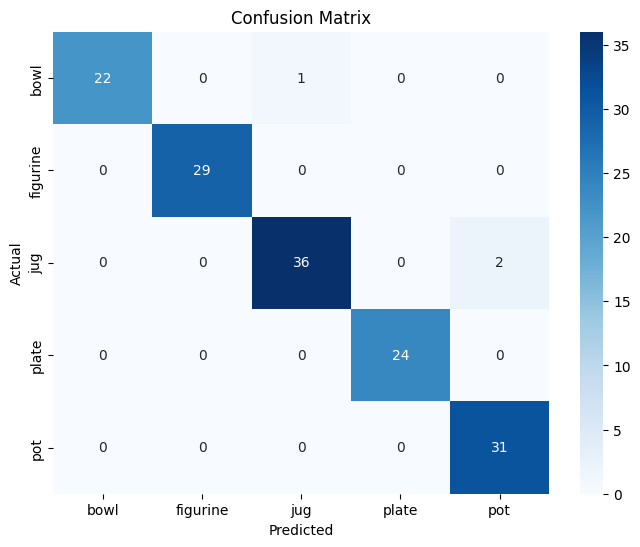

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.backends.backend_pdf  # Import the required module



CM = confusion_matrix(y_test2, y_pred2)

# Define class labels
class_names =['bowl', 'figurine','jug', 'plate','pot']

# Create a heatmap with labels
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(CM, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Create a PdfPages object to save the figure
pdf = matplotlib.backends.backend_pdf.PdfPages("confusion_matrix.pdf")
pdf.savefig() # Save the current figure before plt.show() and plt.close()
pdf.close() # Close the PdfPages object

plt.show() # Now you can display the figure
plt.close() # Close the figure after displaying and saving

In [ ]:
ClassificationReport = classification_report(y_test2,y_pred2)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       1.00      1.00      1.00        29
           2       0.97      0.95      0.96        38
           3       1.00      1.00      1.00        24
           4       0.94      1.00      0.97        31

    accuracy                           0.98       145
   macro avg       0.98      0.98      0.98       145
weighted avg       0.98      0.98      0.98       145

